# ANN Using TensorFlow and Keras

In [17]:
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Necessary Librarsies
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
#loading dataset
data = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
#seeing the type of the data
type(data)

tuple

In [5]:
#check the data type of the first element
type(data[0])

tuple

In [6]:
#the shape of the first element of the first item in data
data[0][0].shape

(60000, 28, 28)

In [7]:
data[0][1].shape

(60000,)

In [8]:
#Splitting the data into test and train
(x_train, y_train), (x_test, y_test) = data

In [9]:
#Checking shape of splited data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Label: 5


<Figure size 600x400 with 0 Axes>

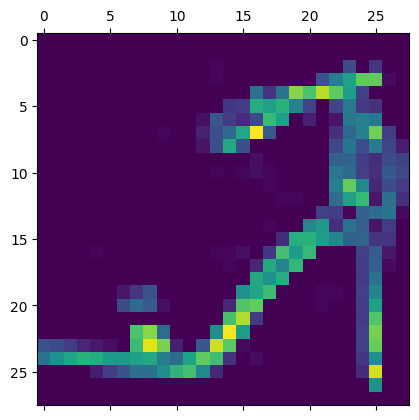

In [11]:
#Visualizing Images
plt.figure(figsize=(6,4))
print("Label:",y_train[8])
plt.matshow(x_train[8])

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
#Reshaping the data
x_train_flat=x_train.reshape(len(x_train),28*28)
x_train_flat.shape

(60000, 784)

In [14]:
#Reshaping the data
x_test_flat=x_test.reshape(len(x_test),784)
x_test_flat.shape

(10000, 784)

In [15]:
#Scaling and Normalization
x_train_scaled, x_test_scaled = x_train / 255.0, x_test / 255.0

In [27]:
#Applying layer and fitting the model
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(500,activation="relu"),
    keras.layers.Dense(250,activation="sigmoid"),
    keras.layers.Dense(100,activation="sigmoid"),
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history = model.fit(x_train,y_train, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.5600 - loss: 1.3146
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.6930 - loss: 0.8360
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7028 - loss: 0.8167
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.6954 - loss: 0.8426
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7059 - loss: 0.7686
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.6995 - loss: 0.7950
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7063 - loss: 0.7706
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.6880 - loss: 0.8280
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7015 - loss: 0.7638
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.6879 - loss: 0.8084
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6581 - loss: 0.8746
Epoch 12

In [28]:

model.evaluate(x_train_scaled, y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7421 - loss: 0.7305


[0.7290599346160889, 0.7417666912078857]

In [29]:
model.evaluate(x_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7362 - loss: 0.7486


[0.7514855265617371, 0.7322999835014343]

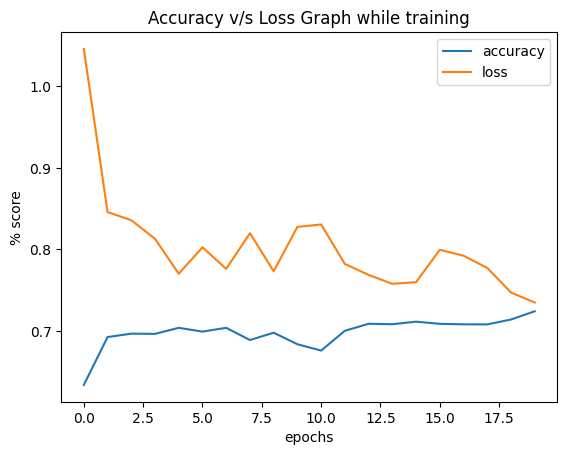

In [30]:
#Model Training Metrics
accuracy = history.history['accuracy']
loss = history.history['loss']

plt.plot(accuracy)
plt.plot(loss)
plt.legend(['accuracy','loss'])
plt.title("Accuracy v/s Loss Graph while training")
plt.xlabel("epochs")
plt.ylabel("% score")
plt.show()

In [32]:
#prediction
y_pred = model.predict(x_test_scaled)

y_pred_labels = [np.argmax(i) for i in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [33]:
y_pred_labels[1:20]

[2, 1, 1, 6, 1, 2, 4, 5, 7, 2, 5, 5, 3, 4, 1, 2, 2, 8, 0]

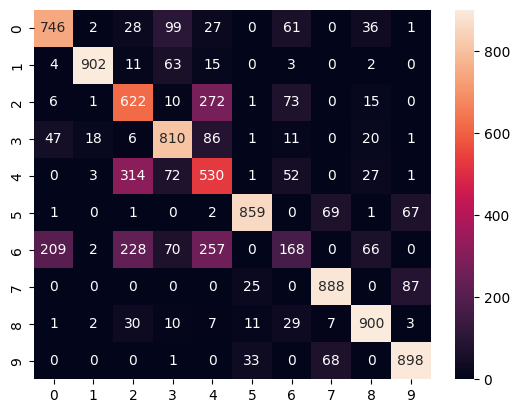

In [35]:
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred_labels)

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [36]:
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1000
           1       0.97      0.90      0.93      1000
           2       0.50      0.62      0.56      1000
           3       0.71      0.81      0.76      1000
           4       0.44      0.53      0.48      1000
           5       0.92      0.86      0.89      1000
           6       0.42      0.17      0.24      1000
           7       0.86      0.89      0.87      1000
           8       0.84      0.90      0.87      1000
           9       0.85      0.90      0.87      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.73      0.73      0.72     10000

